## Installations

In [246]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import r2_score

## Data Analysis

In [339]:
bike_Xtrain = pd.read_csv('XTrain.csv')
bike_Ytrain = pd.read_csv('yTrain.csv')
bike_Xtest = pd.read_csv('XTest.csv')
bike_Ytrain = bike_Ytrain.drop(columns=['Index'])
bike_Xtest = bike_Xtest.drop(columns=['Index'])
bike_Xtrain = bike_Xtrain.drop(columns=['Index'])

bike_Xtrain = bike_Xtrain.rename(columns={ 'Temperature(�C)': 'Temp', 'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Wind Speed', 
                                            'Visibility (10m)': 'Visibility', 'Dew point temperature(�C)': 'Dew point temp', 'Solar Radiation (MJ/m2)': 'Solar Radiation', 
                                            'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall'})
seasons = pd.Categorical(bike_Xtrain['Seasons'])
bike_Xtrain['Seasons'] = seasons.codes
holidays = pd.Categorical(bike_Xtrain['Holiday'])
bike_Xtrain['Holiday'] = holidays.codes
func_day = pd.Categorical(bike_Xtrain['Functioning Day'])
bike_Xtrain['Functioning Day'] = func_day.codes
print('Bike Training Set')
bike_Xtrain.head()

Bike Training Set


,Date,Hour,Temp,Humidity,Wind Speed,Visibility,Dew point temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,26/04/2018,5,10.2,73,0.8,1137,5.5,0.00,0.0,0.0,1,1,1
1,2/4/2018,7,15.1,80,1.0,623,11.6,0.01,0.0,0.0,1,1,1
2,25/05/2018,8,17.1,57,1.7,792,8.5,1.21,0.0,0.0,1,1,1
3,8/4/2018,22,2.7,88,2.0,621,0.9,0.00,0.0,0.0,1,1,1
4,6/4/2018,17,6.3,50,4.4,707,-3.3,0.64,0.0,0.0,1,1,1


In [340]:

bike_Xtest = bike_Xtest.rename(columns={'Temperature(�C)': 'Temp', 'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Wind Speed', 
                                            'Visibility (10m)': 'Visibility', 'Dew point temperature(�C)': 'Dew point temp', 'Solar Radiation (MJ/m2)': 'Solar Radiation', 
                                            'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall'})
seasons = pd.Categorical(bike_Xtest['Seasons'])
bike_Xtest['Seasons'] = seasons.codes
holidays = pd.Categorical(bike_Xtest['Holiday'])
bike_Xtest['Holiday'] = holidays.codes
func_day = pd.Categorical(bike_Xtest['Functioning Day'])
bike_Xtest['Functioning Day'] = func_day.codes
bike_Xtest.head()

,Date,Hour,Temp,Humidity,Wind Speed,Visibility,Dew point temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,8/10/2018,17,20.0,28,0.7,2000,0.9,0.79,0.0,0.0,0,1,1
1,25/04/2018,15,22.8,21,2.1,1542,-0.6,2.75,0.0,0.0,1,1,1
2,13/06/2018,19,22.8,64,2.3,1444,15.6,0.45,0.0,0.0,2,1,1
3,7/10/2018,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,0,1,1
4,15/10/2018,3,11.3,85,0.0,907,8.8,0.00,0.0,0.0,0,1,1


ValueError: Could not interpret input 'Month'

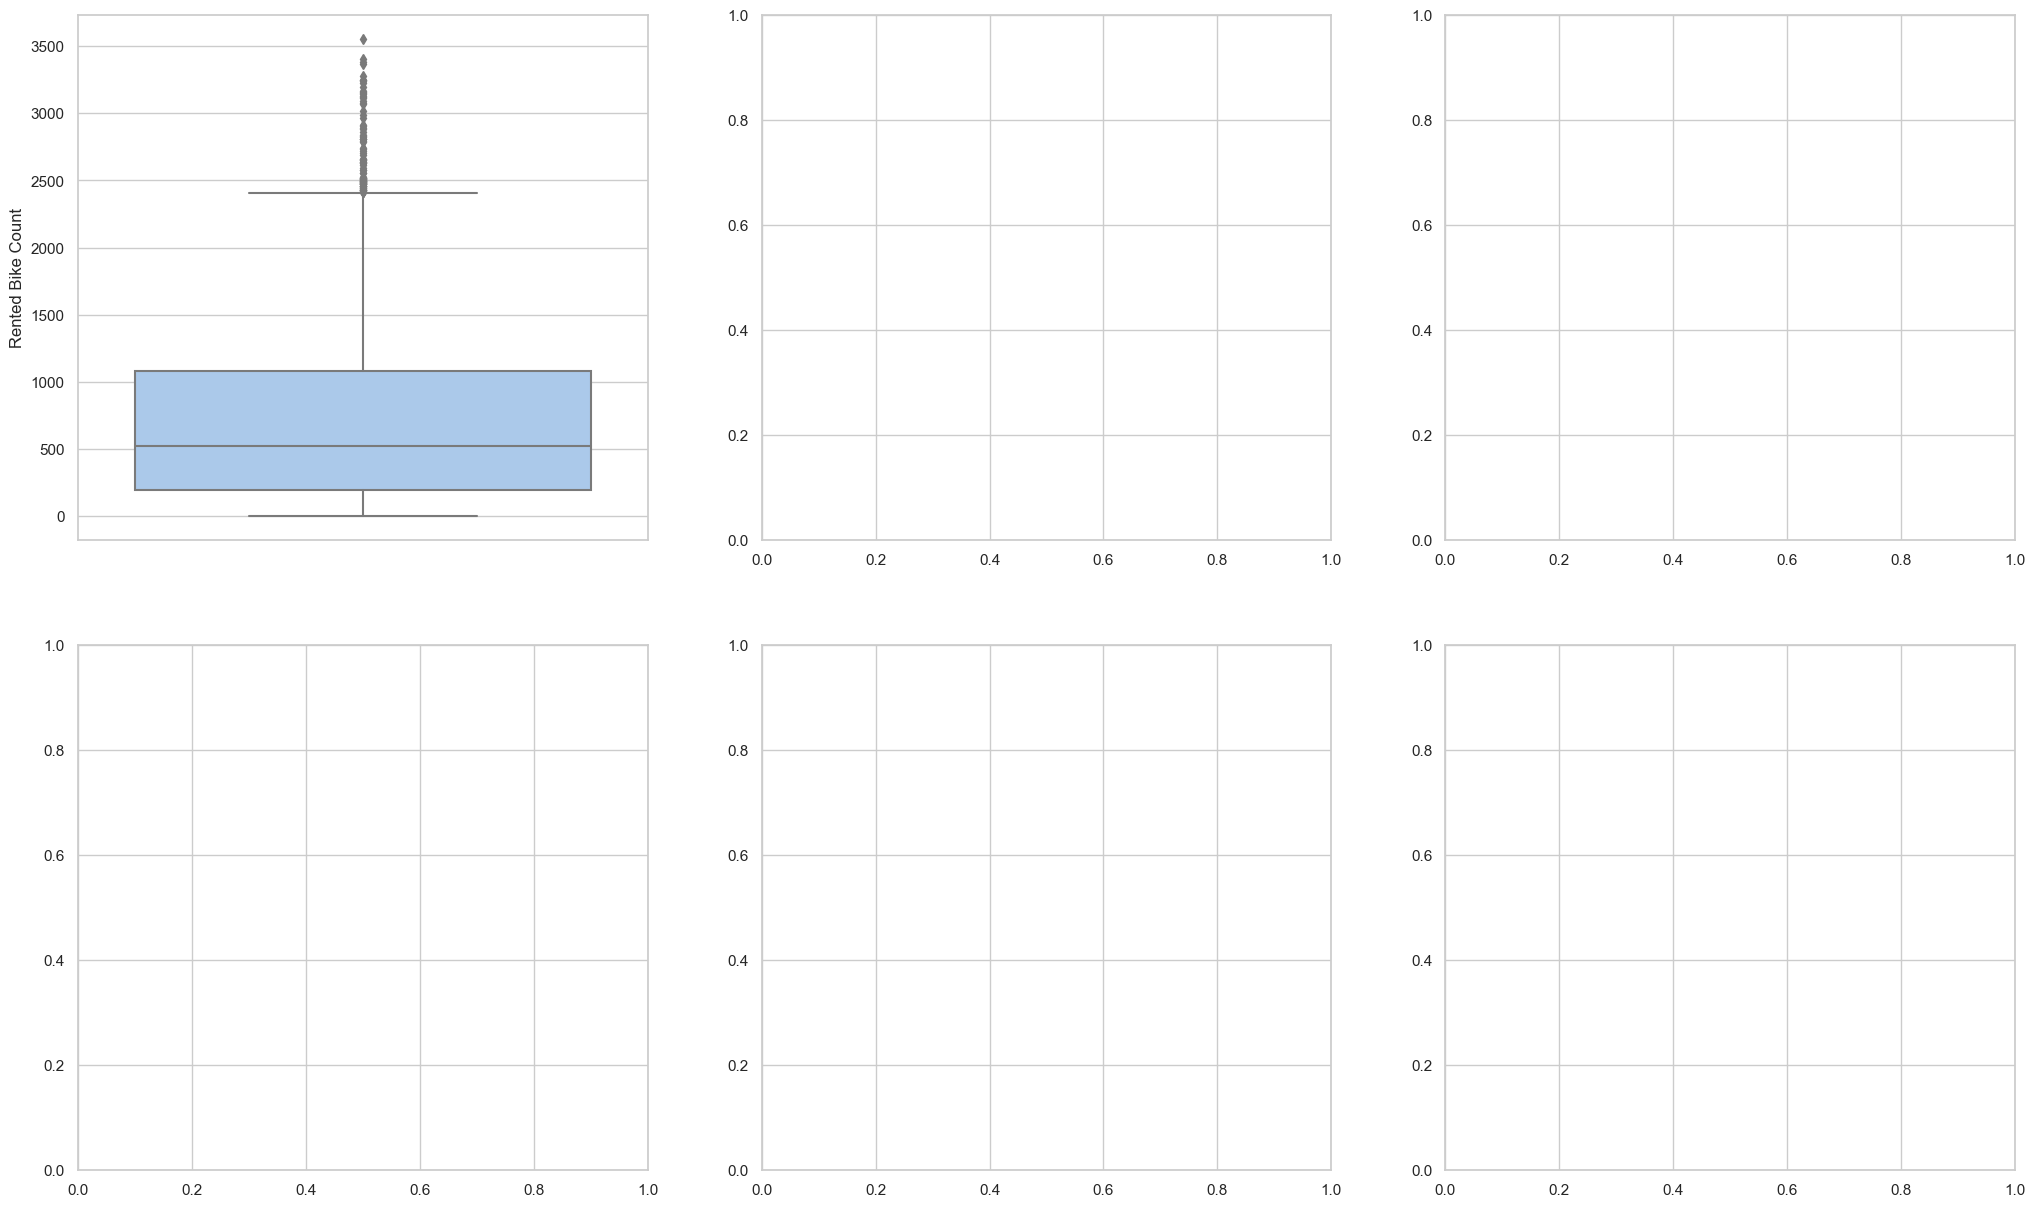

In [341]:
data = pd.concat([bike_Xtrain, bike_Ytrain], axis=1, join='inner')
fig, axes = plt.subplots(ncols = 3, nrows=2)
fig.set_size_inches(25, 15)
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(data=data, y= 'Rented Bike Count', orient = 'v', ax = axes[0][0])
sns.boxenplot(data=data, x = 'Month', y = 'Rented Bike Count', ax = axes[0][1])
sns.stripplot(data = data, x = 'Hour', y = 'Rented Bike Count', hue = 'Hour', ax = axes[0][2])
sns.violinplot(data = data, x = 'Seasons', y = 'Rented Bike Count', ax = axes[1][0])
sns.violinplot(data = data, x = 'Holiday', y = "Rented Bike Count", ax = axes[1][1])
sns.violinplot(data = data, x = 'Functioning Day', y = 'Rented Bike Count', ax = axes[1][2])


## Data Processing

In [342]:
bike_Xtrain['Date'] = pd.to_datetime(bike_Xtrain['Date'], infer_datetime_format=True).dt.day_name()
bike_Xtest['Date'] = pd.to_datetime(bike_Xtest['Date'], infer_datetime_format=True).dt.day_name()

bike_Xtrain.head()

/var/folders/lt/dwt7vtzj1sx2nvf4fgrn8r_00000gn/T/ipykernel_21798/500188859.py:2: UserWarning: Parsing '25/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_Xtest['Date'] = pd.to_datetime(bike_Xtest['Date'], infer_datetime_format=True).dt.day_name()
/var/folders/lt/dwt7vtzj1sx2nvf4fgrn8r_00000gn/T/ipykernel_21798/500188859.py:2: UserWarning: Parsing '13/06/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_Xtest['Date'] = pd.to_datetime(bike_Xtest['Date'], infer_datetime_format=True).dt.day_name()
/var/folders/lt/dwt7vtzj1sx2nvf4fgrn8r_00000gn/T/ipykernel_21798/500188859.py:2: UserWarning: Parsing '15/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_Xtest['Date'] = pd.to_datetime(bike_Xtest['Date'], infer_datetime_format=True).dt.day_name()
/var/folders/lt/dwt7vtzj1sx2nvf4fgrn8r_00000gn/T/ipykernel

,Date,Hour,Temp,Humidity,Wind Speed,Visibility,Dew point temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,Thursday,5,10.2,73,0.8,1137,5.5,0.00,0.0,0.0,1,1,1
1,Monday,7,15.1,80,1.0,623,11.6,0.01,0.0,0.0,1,1,1
2,Friday,8,17.1,57,1.7,792,8.5,1.21,0.0,0.0,1,1,1
3,Sunday,22,2.7,88,2.0,621,0.9,0.00,0.0,0.0,1,1,1
4,Friday,17,6.3,50,4.4,707,-3.3,0.64,0.0,0.0,1,1,1


In [343]:
date = pd.Categorical(bike_Xtrain['Date'])
bike_Xtrain['Date'] = date.codes

# date = pd.Categorical(bike_Xtest['Date'])
# bike_Xtest['Date'] = date.codes

bike_Xtrain.head()

,Date,Hour,Temp,Humidity,Wind Speed,Visibility,Dew point temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,4,5,10.2,73,0.8,1137,5.5,0.00,0.0,0.0,1,1,1
1,1,7,15.1,80,1.0,623,11.6,0.01,0.0,0.0,1,1,1
2,0,8,17.1,57,1.7,792,8.5,1.21,0.0,0.0,1,1,1
3,3,22,2.7,88,2.0,621,0.9,0.00,0.0,0.0,1,1,1
4,0,17,6.3,50,4.4,707,-3.3,0.64,0.0,0.0,1,1,1


In [344]:
X_train, X_valid, y_train, y_valid = train_test_split(bike_Xtrain, bike_Ytrain, test_size=0.2, random_state=42)

columns_to_scale = ['Temp','Humidity','Wind Speed']
scaling = StandardScaler().fit(X_train[columns_to_scale])

X_train[columns_to_scale] = scaling.transform(X_train[columns_to_scale])
X_valid[columns_to_scale] = scaling.transform(X_valid[columns_to_scale])

3945    0
1345    4
1606    1
2377    5
1055    2
       ..
3772    4
5191    0
5226    4
5390    6
860     3
Name: Date, Length: 4905, dtype: int8


In [184]:
# def create_sequence(X, y, time_steps = 1): 
#     input_seqeunce, output = [], []
#     for i in range(len(X) - time_steps): 
#         sequence = X.iloc[i: (i+ time_steps)].values
#         input_seqeunce.append(sequence)
#         output.append(y.iloc[i + time_steps])
#     return np.array(input_seqeunce), np.array(output)

# np.set_printoptions(suppress=True)
# time_steps = 0

# xtrain_seq, ytrain_output = create_sequence(xtrain, ytrain['Rented Bike Count'], time_steps)
# xtest_seq, _ = create_sequence(xtest, xtrain['Holiday'], time_steps)

# print('Shape of training data: ',xtrain_seq.shape,'. Shape of y output data: ', ytrain_output.shape) 
# print('Shape of training data: ',xtest_seq.shape,'. Shape of y output data: ', _.shape) 

# def machine_learning_model():
#     """Defines machine learning model
    
#     Returns:
#         * model: LSTM model
    
#     """
#     model = keras.Sequential()
#     model.add(keras.layers.LSTM(units=128,input_shape=(xtrain_seq.shape[1], xtrain_seq.shape[2])))
#     model.add(keras.layers.Dropout(rate=0.2))
#     model.add(keras.layers.Dense(units=1))
#     model.compile(loss='mean_squared_error', optimizer='Adam', metrics=[r2_score], run_eagerly=True)
#     model.summary()
#     return model

# model = machine_learning_model()

# history = model.fit(
#     xtrain_seq,
#     ytrain_output,
#     epochs = 50, 
#     batch_size = 64,
#     validation_split = 0.1,
#     shuffle=False
# )

In [345]:
mlp = MLPRegressor(hidden_layer_sizes=200, tol = 0.0000001).fit(X_train, np.ravel(y_train))

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [346]:
y_pred = mlp.predict(X_valid)
y_pred[y_pred < 0] = 0

print(r2_score(y_valid, y_pred))
# df = pd.DataFrame(y_pred, columns=['Rented Bike Count'])

0.5478804490995688


In [292]:
scaling = StandardScaler().fit(bike_Xtrain)

X_train_scaled = scaling.transform(bike_Xtrain)
X_test_scaled = scaling.transform(bike_Xtest)

In [293]:
mlp = MLPRegressor(hidden_layer_sizes=200, tol = 0.0000001).fit(X_train_scaled, np.ravel(bike_Ytrain))

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [294]:
y_pred = mlp.predict(X_test_scaled)
y_pred[y_pred < 0] = 0
print(y_pred.shape)

df = pd.DataFrame({'Rented Bike Count': y_pred})

(2628,)


In [295]:
df.to_csv('test4.csv')